Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

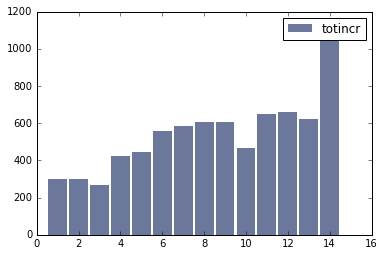

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

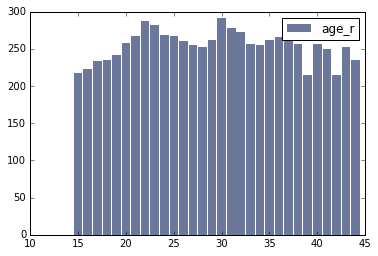

In [4]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

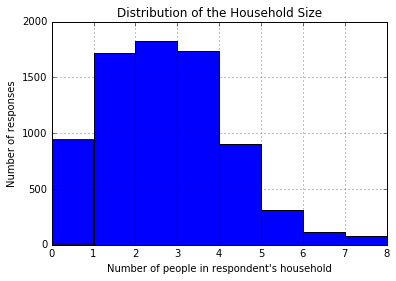

In [5]:
import matplotlib.pyplot as plt
# Cool, there's a panas DataFrame.hist() function that lets us go straight from a historgram
# This function also defaults to 10 bins, and I want one per value. 
resp.hist("numfmhh", bins = 8)
plt.xlabel("Number of people in respondent's household")
plt.ylabel("Number of responses")
plt.title("Distribution of the Household Size")

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

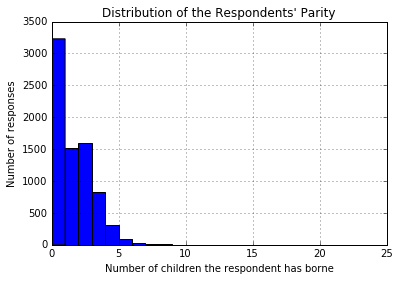

In [6]:
resp.hist("parity", bins = 22)
plt.xlabel("Number of children the respondent has borne")
plt.ylabel("Number of responses")
plt.title("Distribution of the Respondents' Parity")

It seems that the vast majority of respondents have borne between 0-2 children previously, and that there are basically no respondents who have had more than 5 or 6 chilren. This distributions is certainly not uniform, and looks a litle more like a gaussian or normal distribution, except only half of it. There is no tail to the left. This is not surprising, because it would not make sense for a respondent to have borne negative children. 

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
# Here, I want to get better at pandas/numpy so I'm not going to use the Hist.Largest function
# This will return the largest values and the row number of the first occurrence of this value

print ("number of children | number of respondents")
print(resp.parity.value_counts().sort_index()[-5:])

number of children | number of respondents
8     8
9     2
10    3
16    1
22    1
Name: parity, dtype: int64


I'm a little surprised by someone haivng 22 or 16 children. I certainly would believe that these could be entries that were wrongly inputted, but I also don't know tons about the number of children people tend to have/can have. Since the other, larger  counts each have more than one response, I'm less inclined to believe that these are mistakes. 

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

To do this, I first want to find the respondents with high income. Then, I'll filter the respondents based on a threshold income. Then, I'll find the distribution of parity for just those participants. 

After looking at the [Codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776), it appears that this field is a recode, and the highest income participants have income code of 14. So, to find the highest income participants, I'll use only participants with totincr 14.  

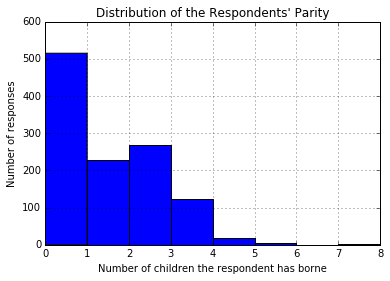

In [8]:
highIncomeResp = resp[resp.totincr == 14]
highIncomeResp.hist("parity", bins = 8)
plt.xlabel("Number of children the respondent has borne")
plt.ylabel("Number of responses")
plt.title("Distribution of the Respondents' Parity")

Find the largest parities for high income respondents.

In [9]:
print ("number of children | number of respondents")
print(highIncomeResp.parity.value_counts().sort_index()[-5:])

number of children | number of respondents
3    123
4     19
5      5
7      1
8      1
Name: parity, dtype: int64


Interesting... It seems like people with higher income tend to have fewer children. 

Compare the mean <tt>parity</tt> for high income respondents and others.

In [10]:
print("Highest income parity mean: " + str(highIncomeResp.parity.mean()))
notHighestResp = highIncomeResp = resp[resp.totincr < 14]
print("Not highest income parity mean: " + str(notHighestResp.parity.mean()))

Highest income parity mean: 1.07586206897
Not highest income parity mean: 1.24957581367


So, it does seem that higher income families tend to have fewer children, although not by much.

Investigate any other variables that look interesting.

I'm interested in how whether or not the respondent has a degree affects the number of children they have had, so I'm going to be doing similar analysis as above, but with degree status as the differentiator, not income. I would expect that there are similar trends as with income, where respondents with degrees tend to have fewer children. 

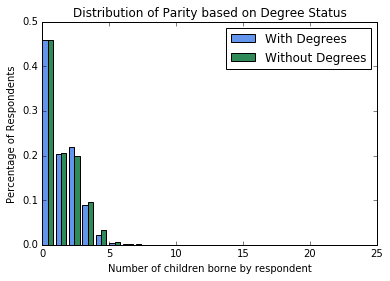

In [40]:
import numpy as np

#First split up the dataframe as those with degrees and those without degrees
withDegrees = resp[resp.havedeg == 1]
withoutDegrees = resp[resp.havedeg == 5]

#Histogram code borrowed from: http://stackoverflow.com/questions/25539195/multiple-histograms-in-pandas
fig, ax = plt.subplots()


withoutDegreeHeights, withoutDegreeBins = np.histogram(withoutDegrees['parity'], bins = 22, density = 1)
withDegreeHeights, withDegreeBins = np.histogram(withDegrees['parity'], bins = withoutDegreeBins, density = 1)

width = (withDegreeBins[1] - withDegreeBins[0])/2.5

ax.bar(withDegreeBins[:-1], withDegreeHeights, width=width, facecolor='cornflowerblue')
ax.bar(withoutDegreeBins[:-1]+width, withoutDegreeHeights, width=width, facecolor='seagreen')


ax.legend(['With Degrees', 'Without Degrees'])
ax.set_xlabel('Number of children borne by respondent')
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Distribution of Parity based on Degree Status')

Although I'm not too sure about this, it does not seem that degree status has a huge effect on how many children someone has had. (To do this analysis, I used a normalized version of the histogram, so that I had percentage of women, instead of just the pure count.) In other words, it seems that income is a much better predictor of the number of children someone will have than whether or not that person has a degree. Interesting.

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

To do this, I first had to read in the pregnancy dataframe, because the resp dataframe did not contain information about birth order

In [45]:
import nsfg
births = nsfg.ReadFemPreg()
births

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


Next, I separate the births dataframe into two separate dataframes based on birth order

In [47]:
firsts = births[births.birthord==1]
others = births[births.birthord>1]
firstCount = len(firsts)
othersCount = len(others)
firstCount,othersCount

(4413, 4735)

Now, we calcualte the mean weight of first babies and the mean weight of other babies

In [52]:
firstsMeanWt = firsts.totalwgt_lb.mean()
othersMeanWt = others.totalwgt_lb.mean()
firstsMeanWt,othersMeanWt

(7.201094430437772, 7.325855614973262)

So, it looks like first babies tend to be a little lighter than other babies

Now, let's calculate the Cohen's _d_

In [56]:
import math
diff = firstsMeanWt - othersMeanWt

firstsVarWt = firsts.totalwgt_lb.var()
othersVarWt = others.totalwgt_lb.var()

pooledVarWt = (firstCount*firstsVarWt + othersCount*othersVarWt)/(firstCount + othersCount)

d = diff/math.sqrt(pooledVarWt)
print ("Cohen's d: " + str(d))

Cohen's d: -0.0886729270726
